# Pseudospectra of the first derivative

Illustration of the spectra and pseudospectra of the first derivative operator and the Chebyshev differentiation matrix on the interval $[-1,1]$, with no boundary conditions and with a boundary condition.

Running this notebook requires Jupyter notebooks with the [matlab_kernel](https://pypi.python.org/pypi/matlab_kernel) installed, Matlab, and the Matlab package [chebfun](http://www.chebfun.org/).

Developed by Randy LeVeque for a course on Approximation Theory and Spectral Methods at the University of Washington.  See <http://faculty.washington.edu/rjl/classes/am570a2015/codes.html> for more Jupyter Notebook examples.


In [1]:
path(path,'/Users/rjl/git/chebfun')   # modify this for your local system

## No boundary conditions

The first derivative operator $\partial_x$ on $[-1,1]$ with no boundary condition imposed has as its spectrum the entire complex plane, since for any $z$ there is an eigenfunction $e^{zx}$ with eigenvalue $z$.

Now consider the square Chebyshev differentiation matrix $D$ with no boundary conditions imposed.  This matrix maps values of $u(x_j)$ at $N$ Chebyshev points to the approximation to the derivative $u_x(x_j)$ at these same points. The values $U_0$ and $U_N$ can be arbitrary.

Recall that if we apply $D^2$ to a vector we get approximations to the second derivative that correspond to $p''(x_j)$, where $p$ is the polynomial of degree $N$ that interpolates the $U_j$ values.  Similarly if we apply $D^{N+1}$ we get values of the $(N+1)$st derivative of the polynomial, but $p^{(N+1)}(x) \equiv 0$, so $D^{N+1}$ is the zero matrix. Hence $D$ is nilpotent and all eigenvalues are equal to 0.

Since $D$ is highly non-normal, if we compute the eigenvalues numerically we get nonzero values because of rounding errors...

## Set up the matrix and investigate eigenvalues:

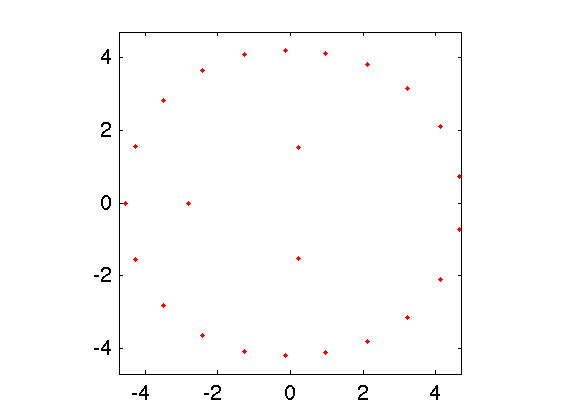

In [2]:
N = 24;
Dop = chebop(@(u) diff(u));
D = matrix(Dop,N, 'oldschool');

[V,Lam] = eig(D);
Lam = diag(Lam);
Lmax = max(abs(Lam));

plot(real(Lam),imag(Lam),'r.')
axis([-Lmax,Lmax,-Lmax,Lmax])
axis 'square'

We can compute the pseudo-spectrum $\sigma_\epsilon(D)$ by first computing the minimum singular value of $(zI-D)$ on a fine grid of points and then plotting the $\epsilon$ contour of this function...

In [3]:
xylim = 50;
x1 = linspace(-xylim,xylim,200);
y1 = linspace(-xylim,xylim,200);
[xx,yy] = meshgrid(x1,y1);
zz = xx + 1i*yy;
I = eye(size(D,1));
sigmin = zeros(size(zz));
for j=1:length(x1)
    for i=1:length(y1)
        sigmin(i,j) = min(svd(zz(i,j)*I - D));
        end
    end

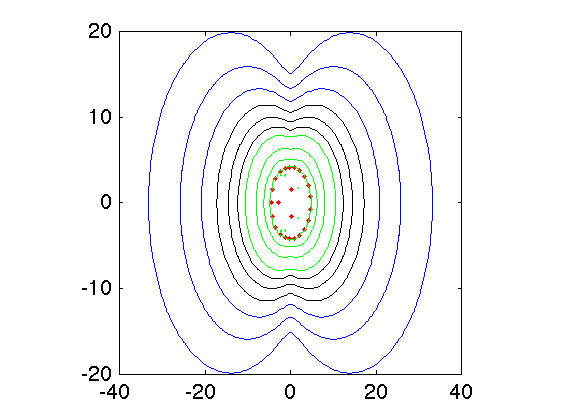

In [4]:
plot(real(Lam),imag(Lam),'r.')
hold on
contour(xx,yy,sigmin,[1e-2,1e-3,1e-4],'b')
contour(xx,yy,sigmin,[1e-5,1e-6,1e-7],'k')
contour(xx,yy,sigmin,[1e-8,1e-10,1e-12, 1e-14],'g')
axis square

Note that the computed eigenvalues lie within the $\epsilon = 10^{-14}$ pseduo-spectrum. 

### Finer grid

If we make the grid finer we get a better approximation to $\partial_x$.  The larger $D$ matrix is still nilpotent, but the pseudospectra move out to cover more of the complex plane:

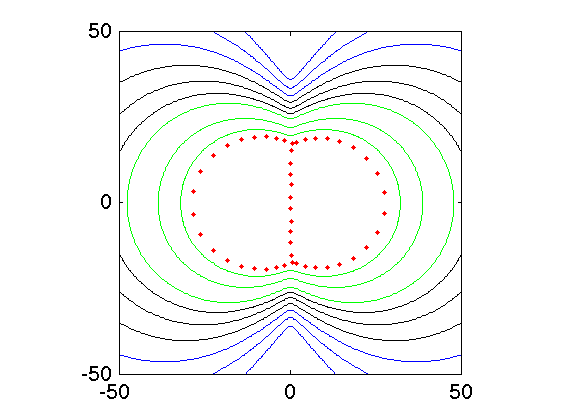

In [5]:
N = 48;
Dop = chebop(@(u) diff(u));
D = matrix(Dop,N, 'oldschool');
[V,Lam] = eig(D);
Lam = diag(Lam);

xylim = 50;
x1 = linspace(-xylim,xylim,200);
y1 = linspace(-xylim,xylim,200);
[xx,yy] = meshgrid(x1,y1);
zz = xx + 1i*yy;
I = eye(size(D,1));
sigmin = zeros(size(zz));
for j=1:length(x1)
    for i=1:length(y1)
        sigmin(i,j) = min(svd(zz(i,j)*I - D));
        end
    end
    
plot(real(Lam),imag(Lam),'r.')
hold on
contour(xx,yy,sigmin,[1e-2,1e-3,1e-4],'b')
contour(xx,yy,sigmin,[1e-5,1e-6,1e-7],'k')
contour(xx,yy,sigmin,[1e-8,1e-10,1e-12],'g')
axis square

### Adding a boundary condition

Now consider the differential operator $\partial_x$ on $[-1,1]$ with the boundary condition $u(1) = 0$.  This is the operator we will want to discretize to solve the advection equation $u_t = u_x$, whose solution advects to the left.

We obtain the Chebyshev approximation by computing the square $N\times N$ matrix as above but then dropping the last row and column.  Dropping the last column corresponds to assuming $U_N=0$. 

In [13]:
N = 24;
Dop = chebop(@(u) diff(u));
D = matrix(Dop,N, 'oldschool');
D = D(1:N-1, 1:N-1);

[V,Lam] = eig(D);
Lam = diag(Lam);
Lmax = max(abs(Lam))

Lmax =
  47.709852102845140

In [14]:
xylim = 50;
x1 = linspace(-xylim,xylim,200);
y1 = linspace(-xylim,xylim,200);
[xx,yy] = meshgrid(x1,y1);
zz = xx + 1i*yy;
I = eye(size(D,1));
sigmin = zeros(size(zz));
for j=1:length(x1)
    for i=1:length(y1)
        sigmin(i,j) = min(svd(zz(i,j)*I - D));
        end
    end

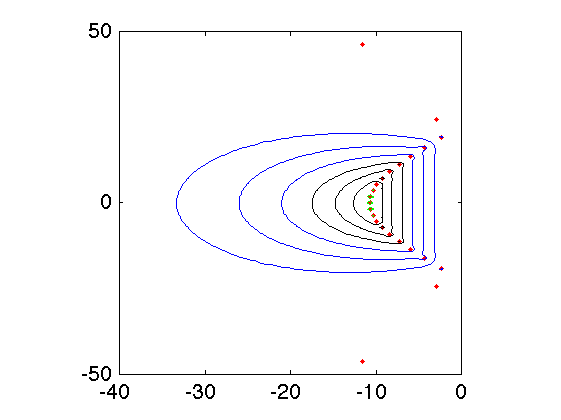

In [15]:
plot(real(Lam),imag(Lam),'r.')
hold on
contour(xx,yy,sigmin,[1e-2,1e-3,1e-4],'b')
contour(xx,yy,sigmin,[1e-5,1e-6,1e-7],'k')
contour(xx,yy,sigmin,[1e-8,1e-10,1e-12],'g')
axis square

### Finer grid:

In [17]:
N = 32;
Dop = chebop(@(u) diff(u));
D = matrix(Dop,N, 'oldschool');
D = D(1:N-1, 1:N-1);
[V,Lam] = eig(D);
Lam = diag(Lam);
Lmax = max(abs(Lam))

Lmax =
  85.976853327079667

In [10]:
xylim = 50;
x1 = linspace(-xylim,xylim,200);
y1 = linspace(-xylim,xylim,200);
[xx,yy] = meshgrid(x1,y1);
zz = xx + 1i*yy;
I = eye(size(D,1));
sigmin = zeros(size(zz));
for j=1:length(x1)
    for i=1:length(y1)
        sigmin(i,j) = min(svd(zz(i,j)*I - D));
        end
    end

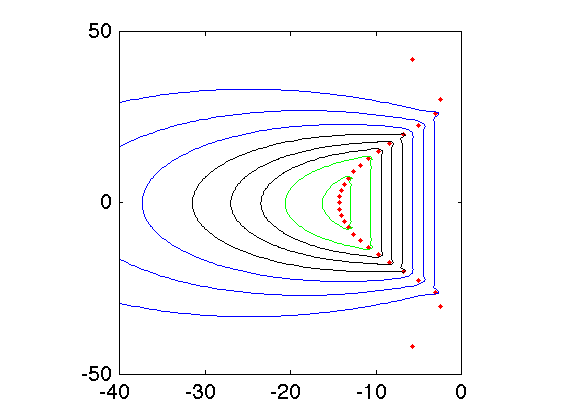

In [11]:
plot(real(Lam),imag(Lam),'r.')
hold on
contour(xx,yy,sigmin,[1e-2,1e-3,1e-4],'b')
contour(xx,yy,sigmin,[1e-5,1e-6,1e-7],'k')
contour(xx,yy,sigmin,[1e-8,1e-10,1e-12],'g')
axis([-40,0,-50,50])
axis square

Note that in this case there are additional eigenvalues not show with magnitude $|\lambda| \approx 86$, but that these eigenvalues, like the ones shown that are away from the central curve, are well-conditioned and have small pseudospectral balls around them.  

The main things to notice in these figures are:
- The eigenvalues and pseudospectra lie in the left half plane,
- The pseudospectra include vertical lines near the origin.  As the grid is refined, a larger region near the origin is covered by these vertical contours.

The latter obervation suggests that the pseudospectrum of the differential operator we are approximating, $\partial_x$ on $[-1,1]$ with $u(1)=0$, might have this behavior everywhere in the left half plane.  Indeed it does.

Note that this differential operator has no eigenvalues.  The functions $e^{zx}$ are no longer eigenfunctions because they do not satisfy the boundary condition.  However, if $Re(z) < 0$ then these decay as $x$ increases and if they decay fast enough then $u(1)$ is nearly 0 relative to $u(-1)$.  This suggests with $Re(z)$ very negative these are pseudo-eigenfunctions for very small values of $\epsilon$.   Since the decay rate depends only on the real part, this further suggests that the pseudospectra should be regions of the left halfplane bounded by vertical lines.  See Chapters 5 and 30 of Trefethen and Embree's *Spectral and Pseudospectra* for more details.